In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

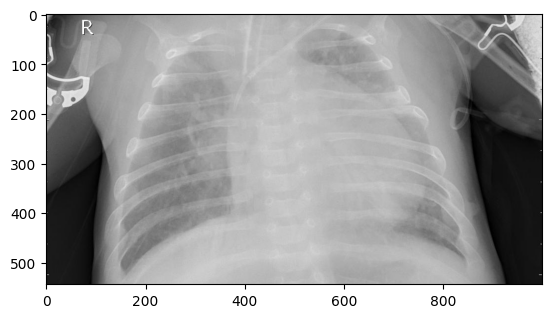

In [2]:
# Load and display an image
img = image.load_img('D:\\SEMESTER 6\\1. Kecerdasan Buatan AI\\TBPneumonia\\Datasets\\test\\PNEUMONIA\\person1_virus_7.jpeg')
plt.imshow(img)

In [3]:
# Set up directories and data generators
train_dir = os.path.join('Datasets/test')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 500 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [5]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Adjust to the number of classes
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.80):
            print("\nAkurasi telah mencapai >80%!")
            self.model.stop_training = True

callbacks = myCallback()

c:\Users\LANA\anaconda3\envs\latihan_machine_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/5


c:\Users\LANA\anaconda3\envs\latihan_machine_learning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 - 18s - 281ms/step - accuracy: 0.5920 - loss: 0.7309 - val_accuracy: 0.6290 - val_loss: 0.6811
Epoch 2/5
63/63 - 10s - 162ms/step - accuracy: 0.6220 - loss: 0.6564 - val_accuracy: 0.6290 - val_loss: 0.6694
Epoch 3/5
63/63 - 10s - 162ms/step - accuracy: 0.6560 - loss: 0.6383 - val_accuracy: 0.6210 - val_loss: 0.6524
Epoch 4/5
63/63 - 10s - 159ms/step - accuracy: 0.6940 - loss: 0.5912 - val_accuracy: 0.5968 - val_loss: 0.7151
Epoch 5/5
63/63 - 10s - 158ms/step - accuracy: 0.7040 - loss: 0.6027 - val_accuracy: 0.6532 - val_loss: 0.6375


In [8]:
model.save('chest_xray.h5')

Text(0.5, 1.0, 'Training and Validation Accuracy')

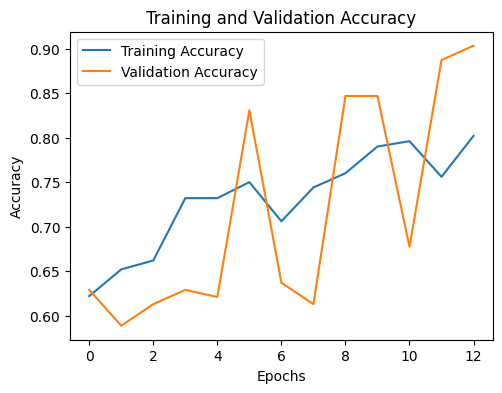

In [24]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

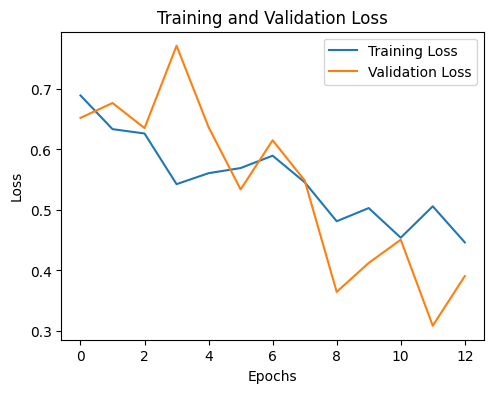

In [25]:
# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted class: NORMAL
Prediction probabilities: [[0.77784956 0.22215047]]


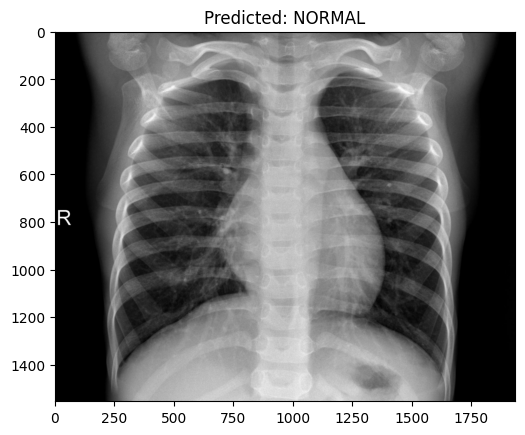

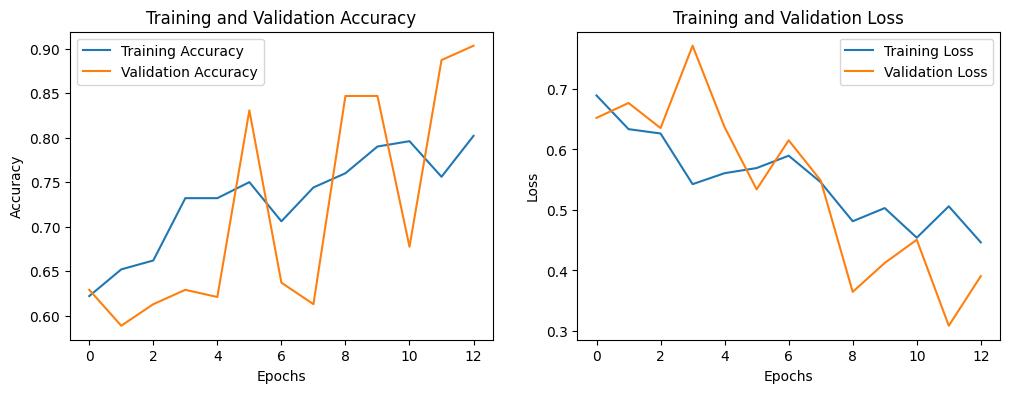

In [31]:

# Function to preprocess and predict the class of a given image
def predict_image(img_path, model, class_indices):
    # Load the image with target size
    img = image.load_img(img_path, target_size=(150, 150))
    # Convert the image to array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model input shape
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image
    img_array /= 255.
    
    # Make prediction
    prediction = model.predict(img_array)
    
    # Get the class with the highest probability
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = list(class_indices.keys())[list(class_indices.values()).index(predicted_class_index)]
    
    return predicted_class_label, prediction

# Example usage
# Get class indices
class_indices = train_generator.class_indices

# Predict a sample image
img_path = 'D:\\SEMESTER 6\\1. Kecerdasan Buatan AI\\TBPneumonia\\Pneumonia_AI\\Datasets\\test\\NORMAL\\NORMAL2-IM-0357-0001.jpeg'  # replace with your image path
predicted_class, prediction = predict_image(img_path, model, class_indices)

print(f"Predicted class: {predicted_class}")
print(f"Prediction probabilities: {prediction}")

# Load and display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()